<p style="font-size: 30px; line-height: 135%;}">
<b>4 Reconocimiento de imagenes Sign gestures</b>
</p>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    #you need to add Xval: x_v,y_v
    x_tr, x_v, y_tr, y_v = train_test_split(x_tr, y_tr, test_size=0.25, random_state=42)
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_train, y_val , y_test = load_data()

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 4, pregunta a</b>
</p>

In [2]:
print('Train size: ', len(x_tr))
print('Validation size: ', len(x_v))
print('Test size:', len(x_t))

Train size:  20591
Validation size:  6864
Test size: 7172


<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b> 
Para las pruebas se tiene una partición de entrenamiento, validación y pruebas. Cada uno de los set nombrados se distribuye tal que como se muestra arriba.
</p>

In [3]:
"""msk = np.random.rand(len(x_tr)) < 0.4
x_tr = x_tr[msk]
y_train = y_train[msk]"""

'msk = np.random.rand(len(x_tr)) < 0.4\nx_tr = x_tr[msk]\ny_train = y_train[msk]'

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 4, pregunta b</b>
</p>

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_tr)
x_val = scaler.transform(x_v)
x_test = scaler.transform(x_t)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_tr)
x_val = scaler.transform(x_v)
x_test = scaler.transform(x_t)

In [6]:
"""from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=10,kernel="rbf", gamma=3)
kpca = kpca.fit(x_train)
xkpca_train = kpca.transform(x_train)
xkpca_test = kpca.transform(x_test)"""
pass

<p style="font-size: 18px; line-height: 135%;}">
<b>b)</b>
Para esta sección se utilizan dos tipos de preprocesamiento incluidos en la librería SKlearn, se trata de StandarScaler y MinMaxScaler, con las pruebas realizadas sobre el conjunto se validación se concluye que para este caso es más efectivo el preprocesamiento proporcionado por el segundo método.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 4, pregunta c</b>
</p>

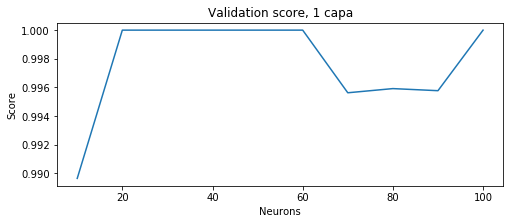

In [7]:
from sklearn.neural_network import MLPClassifier

val_sc = list()
capas = list()
for i in range(1,101):
    if(i%10==0):
        clf = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(i), random_state=1)
        clf.fit(x_train, y_train)
        val_sc.append(clf.score(x_val, y_val))
        capas.append(i)
        
plt.figure(figsize=(8,3))
plt.plot(capas, val_sc)
plt.xlabel('Neurons')
plt.ylabel('Score')
plt.title('Validation score, 1 capa')
plt.show()

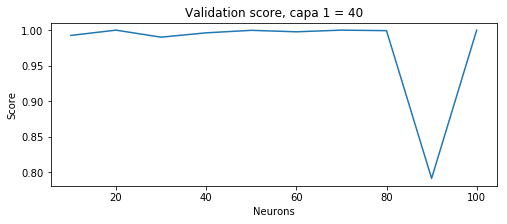

In [8]:
val_sc = list()
capas = list()
for i in range(1,101):
    if(i%10==0):
        clf = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(40, i), random_state=1)
        clf.fit(x_train, y_train)
        val_sc.append(clf.score(x_val, y_val))
        capas.append(i)

        
plt.figure(figsize=(8,3))
plt.plot(capas, val_sc)
plt.xlabel('Neurons')
plt.ylabel('Score')
plt.title('Validation score, capa 1 = 40')
plt.show()

In [9]:
clf = MLPClassifier(solver='adam', activation='logistic', alpha=0.1, hidden_layer_sizes=(40, 40), random_state=1)
clf.fit(x_train, y_train)
print('train: ', clf.score(x_train, y_train))
print('val: ', clf.score(x_val, y_val))
print('test: ', clf.score(x_test, y_test))

train:  0.995240639114
val:  0.992861305361
test:  0.705939765756


<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b> 
Para esta parte se trabaja con la librearia sklearn y no keras. Esta parte del ejercicio resultó complicada dado el hecho de que el score del set de validación al cambiar los parámetros de entrenamiento, se movia en torno al 95-99%, de forma tal que no reflejaba un verdadero valor a si se obtenía un mejor o peor entrenamiento. <br>
Para buscar los mejores parámetros se busca la cantidad de capas y neuronas por capa, llegando a que dos capas con 40 es un buen valor permitiendo un rápido entrenamiento, también se varían los métodos con que se preprocesan los datos y el trabajo sin preprocesamiento. Se busca el mejor solver y función de activación, se decide trabajar con 'adam' por su rápides y en conjunto con activación 'logistic', se varían los parámetros beta del solver 'adam' y se decide que los valores por defecto son los mejores. <br>
Se nota que el problema radica en que se tiene un gran overfitting para el set de validación lo que no permite decidir a partir de este una buena máquina para casos futuros. <br>
Destacar que también se intentó realizar una reducción de dimensionalidad de tipo PCA kernelizado con un subset del conjunto de entrenamientos (por temas de memoria), los resultados para tal fueron nefastos.
</p>

In [30]:
clf = MLPClassifier(solver='adam', activation='relu', alpha=0.1, hidden_layer_sizes=(256, 128, 64), random_state=1)
clf.fit(x_train, y_train)
print('train: ', clf.score(x_train, y_train))
print('val: ', clf.score(x_val, y_val))
print('test: ', clf.score(x_test, y_test))

train:  0.999465786023
val:  0.999271561772
test:  0.7771890686


In [31]:
clf = MLPClassifier(solver='adam', activation='relu', alpha=0.1, hidden_layer_sizes=(512 ,256, 128, 64), random_state=1)
clf.fit(x_train, y_train)
print('train: ', clf.score(x_train, y_train))
print('val: ', clf.score(x_val, y_val))
print('test: ', clf.score(x_test, y_test))

train:  0.993055218299
val:  0.992278554779
test:  0.774818739543


In [92]:
x_train.shape

(20591, 784)

In [128]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(256, input_dim=784, init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(64, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))

model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, to_categorical(y_train), nb_epoch=100, batch_size=128, verbose=1, validation_data=(x_val,to_categorical(y_val)))

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=784, activation="relu", kernel_initializer="uniform")`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
C:\Users\Daniel\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 20591 samples, validate on 6864 samples
Epoch 1/100
20591/20591 [==============================] - 2s 109us/step - loss: 3.2115 - acc: 0.0470 - val_loss: 3.2045 - val_acc: 0.0485

In [129]:
model.evaluate(x_test, to_categorical(y_test))[1]

7172/7172 [==============================] - 0s 57us/step


0.80395984383714447

<p style="font-size: 18px; line-height: 135%;}">
Cambiando parámetros de forma tal que se acerquen a los que se discutió en las presentaciones, se lográ obtener un accuracy cercano a 0.8.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 4, pregunta d</b>
</p>

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)

ind = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
df_conf = pd.DataFrame(data=conf_mat, index=ind, columns=ind)

malo = list()
malo2 = list()
for i in range(len(df_conf)):
    malo.append(sum(df_conf.iloc[:,i]) - df_conf.iloc[i,i])
    malo2.append(malo[i]/ sum(df_conf.iloc[:,i]))

df_conf.loc['Mal'] = malo
with pd.option_context('display.max_rows', None, 'display.max_columns', 24):
    display(df_conf)

df_per = pd.DataFrame(data = malo2, index = ind, columns=['Percentage'])
display(df_per.sort_values(by=['Percentage'], ascending=False))

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
A,331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B,0,328,0,21,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,21,0,42,0,0
C,0,0,270,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0
D,0,0,0,202,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,4,0,20,0
E,0,0,0,0,418,0,0,0,0,0,0,21,0,0,0,0,0,59,0,0,0,0,0,0
F,0,0,0,0,0,226,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0
G,0,0,0,0,0,0,255,1,0,0,0,2,13,0,20,26,0,0,27,0,4,0,0,0
H,0,0,0,0,0,0,22,356,0,0,0,0,0,21,0,37,0,0,0,0,0,0,0,0
I,57,0,0,0,0,0,0,0,165,0,0,0,2,0,0,3,0,11,0,0,0,0,21,29
K,0,0,0,15,0,0,0,0,5,191,5,0,0,0,0,0,55,5,0,0,0,38,0,17


,Percentage
R,0.636872
W,0.569191
S,0.567010
T,0.536680
Q,0.444000
U,0.395349
X,0.394040
I,0.379699
N,0.372807
Y,0.320755


<p style="font-size: 18px; line-height: 135%;}">
<b>d)</b> 
Se construye una matriz de confusión con cada letra, de esta se desprende que los gestos que causan mayor complicación para la máquina son los que corresponden a las letras R, S y U, siendo las predicciones para R equivocas en un 75%. Por otro lado los gestos que corresponden a las letras O, D, C, y B, tienen un error en la predicción en menos de un 1% de las ocasiones. Para resolver el problema sería buena idea diseñar máquinas preparadas para resolver peores casos, de forma tal que al ensamblarlas obtener una mejor solución
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 4, pregunta e</b>
</p>

In [11]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(x_train, y_train)
print('Validation score: ', clf.score(x_val, y_val))

Validation score:  0.787441724942


In [12]:
clf.fit(x_tr, y_train)
print('Validation score: ', clf.score(x_val, y_val))

Validation score:  0.048513986014


In [23]:
msk = np.random.rand(len(x_tr)) < 0.4
x_tr1 = x_tr[msk]
y_train_2 = y_train[msk]
scaler = MinMaxScaler()
x_train_2 = scaler.fit_transform(x_tr1)
x_val_2 = scaler.transform(x_v)

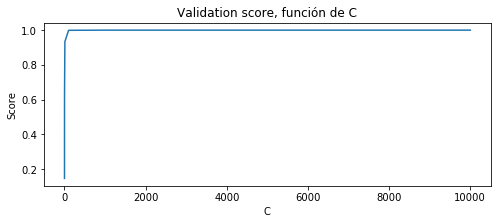

In [14]:
cs = [0.1, 1, 10, 100, 1000, 10000]
val_sc = list()

for i in range(len(cs)):
    clf = SVC(kernel='rbf', C=cs[i])
    clf.fit(x_train_2, y_train_2)
    val_sc.append(clf.score(x_val_2, y_val))

plt.figure(figsize=(8,3))
plt.plot(cs, val_sc)
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Validation score, función de C')
plt.show()

In [15]:
clf = SVC(kernel='linear', C=1000)
clf.fit(x_train_2, y_train_2)
print(clf.score(x_val_2, y_val))

1.0


In [16]:
clf = SVC(kernel='rbf', C=1000)
clf.fit(x_train, y_train)
print('train: ', clf.score(x_train, y_train))
print('val: ', clf.score(x_val, y_val))
print('test: ', clf.score(x_test, y_test))

train:  1.0
val:  1.0
test:  0.792665923034


<p style="font-size: 18px; line-height: 135%;}">
<b>e)</b> 
Primeramente se compara el desempeño de una máquina entrenada con los datos con preprocesamiento y sin este, la máquina entrenada con dastos sin procesar entrega una muy mal accuracy en su set de validación, quedando inmediatamente los datos sin procesar descartados para generar una máquina. Luego al modificar los parámetros de entrenamiento de la máquina, se empieza por el regularizador C, con el valor correcto se logra un accuracy de 100% para el set de validación. Finalmente se obtienen unos resultados para el set de pruebas mejor que con la red neuronal. Al igual que con la red neuronal se tiene que el set de pruebas presenta un resultado más pobre que el de validación, signo de que se produjó overfitting al entrenar lo que provoca que a la máquina 'le cueste' generalizar para casos futuros.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 4, pregunta f</b>
</p>

In [19]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(x_train,y_train)
print('Validation score: ', clf.score(x_val, y_val))

Validation score:  0.0786713286713


In [24]:
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(x_tr,y_train)
print('Validation score: ', clf.score(x_val, y_val))

Validation score:  0.041958041958


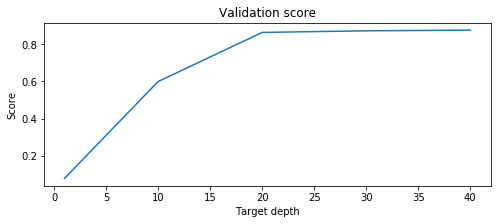

In [25]:
val_sc = list()
dep = [1, 10, 20, 30, 40]
for i in range(len(dep)):
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=dep[i])
    clf.fit(x_train,y_train)
    val_sc.append(clf.score(x_val, y_val))
    
plt.figure(figsize=(8,3))
plt.plot(dep, val_sc)
plt.xlabel('Target depth')
plt.ylabel('Score')
plt.title('Validation score')
plt.show()   

In [26]:
clf=Tree(criterion='entropy',splitter='best',random_state=0,max_depth=32, max_features=None)
clf.fit(x_train,y_train)
print(clf.score(x_val, y_val))
print(clf.score(x_test, y_test))

0.890734265734
0.455242610151


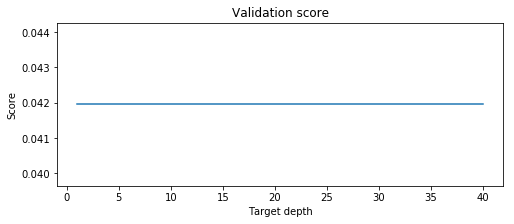

In [27]:
val_sc = list()
dep = [1, 10, 20, 30, 40]
for i in range(len(dep)):
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=dep[i])
    clf.fit(x_tr,y_train)
    val_sc.append(clf.score(x_val, y_val))
    
plt.figure(figsize=(8,3))
plt.plot(dep, val_sc)
plt.xlabel('Target depth')
plt.ylabel('Score')
plt.title('Validation score')
plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b> 
Para la máquina de árboles se sigue el mismo procedimiento que antes y se encuentra que los resultados son mucho mejor para los datos con preprocesamiento, se varían parámetros de entrenamiento y se encuentra que la mejor profundidad es de 32. Con la máquina de árboles se obtienen peores resultados que con SVM y red neuronal.
</p>